# Can we predict benign or malignancy of tumors? 
#Breast cancer prediction


In [142]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO
import plotly.graph_objs as go

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm

# for the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Dropout

In [143]:
data = pd.read_csv("data.csv")
print(data.dtypes)
print(data.head())
print(data.shape)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [91]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [92]:
data_set = data.iloc[:,1:32]

In [93]:
data_set.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [94]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [95]:
data_set.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [96]:
data_set.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
#fit a linear regression model and store the prediction

feature = list(data_set.columns[1:32])
X = data_set[feature]
y = data_set.diagnosis



# normalizing input data into ranges between 0 and 1
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


# Logistic regression

In [98]:
logreg = LogisticRegression(C=1e9 ,solver='lbfgs')  # why le9?

logreg.fit(X_train, y_train)
diagnosis_pred_class_log = logreg.predict(X_test)

 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



In [99]:
diagnosis_pred_class_log

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [100]:
# for model performance
#confusion matrix
cm = metrics.confusion_matrix(y_test, diagnosis_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[34  1]
 [ 2 20]]


In [101]:
print("Classification Report:\n", metrics.classification_report(y_test, diagnosis_pred_class_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.95      0.91      0.93        22

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



# Support vector machine

In [102]:
# SVM 

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [103]:
cm1 = metrics.confusion_matrix(y_test, y_pred)
print("SVM confusion matrix:\n",cm1)

SVM confusion matrix:
 [[35  0]
 [ 0 22]]


In [104]:
print("SVM Classification Report:\n", metrics.classification_report(y_test, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [105]:
# data input with no scaling.

feature = list(data_set.columns[1:32])
X = data_set[feature]
y = data_set.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Decision Tree

In [106]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

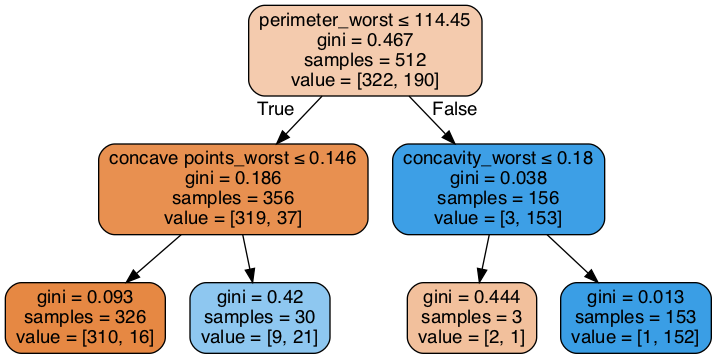

In [107]:
#make a decision tree 
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Train/Test RMSE: 0.2795084971874737   0.3244428422615251
Decision Tree Train/Test RMSE: 0.22963966338592295   0.26490647141300877
Decision Tree Train/Test RMSE: 0.18221724671391565   0.26490647141300877
Decision Tree Train/Test RMSE: 0.15934435979977452   0.22941573387056177
Decision Tree Train/Test RMSE: 0.125   0.22941573387056177
Decision Tree Train/Test RMSE: 0.08838834764831845   0.22941573387056177
Decision Tree Train/Test RMSE: 0.07654655446197431   0.22941573387056177
Decision Tree Train/Test RMSE: 0.04419417382415922   0.3244428422615251
Decision Tree Train/Test RMSE: 0.0   0.26490647141300877
Decision Tree Train/Test RMSE: 0.0   0.26490647141300877


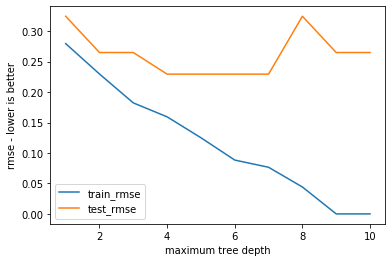

In [108]:
# measure testing errors 
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()


In [109]:
#  The lowest test error occurs for a tree of max depth 4 

best_decision_tree = DecisionTreeClassifier(max_depth=4)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
pd.DataFrame({'feature':feature, 'importance':best_decision_tree.feature_importances_})

,feature,importance
0,radius_mean,0.000000
1,texture_mean,0.000000
2,perimeter_mean,0.000000
3,area_mean,0.000000
4,smoothness_mean,0.016712
5,compactness_mean,0.000000
6,concavity_mean,0.000000
7,concave points_mean,0.006128
8,symmetry_mean,0.000000
9,fractal_dimension_mean,0.000000


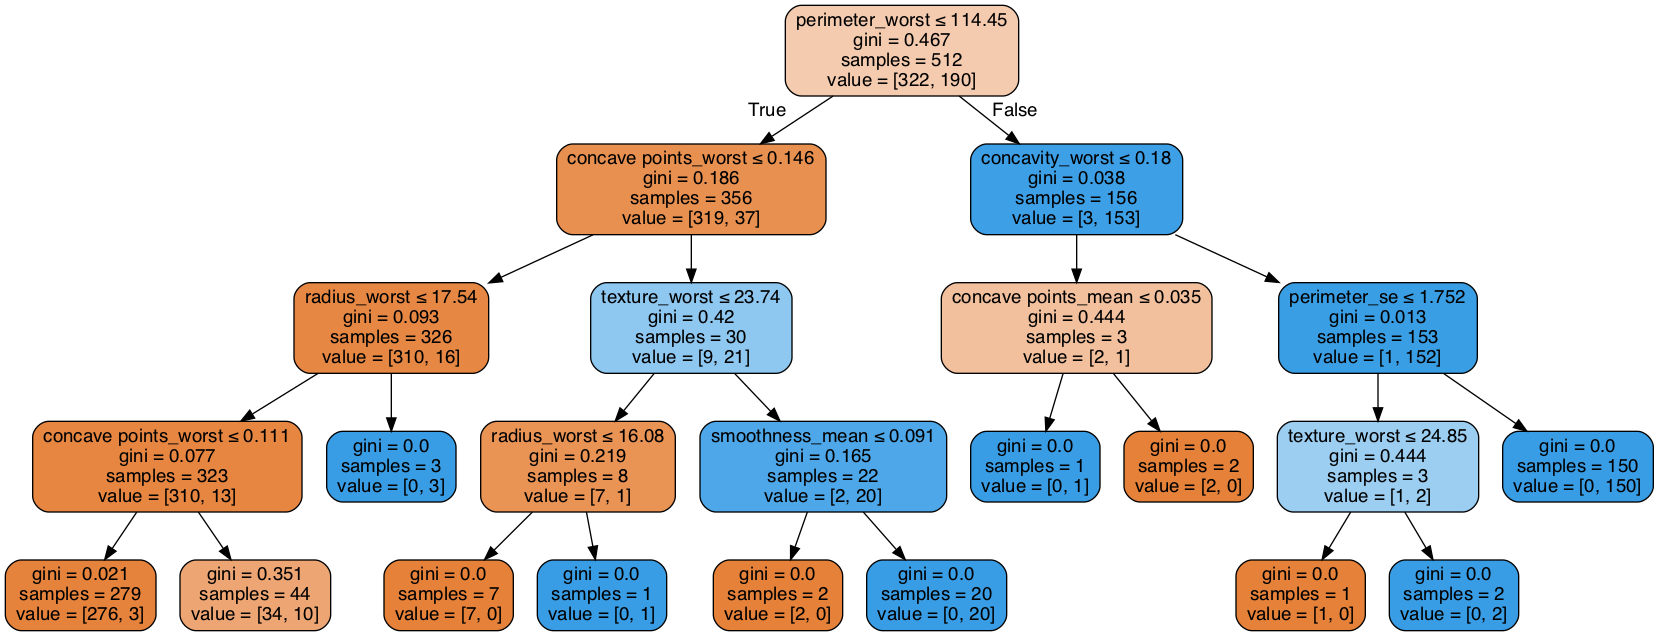

In [111]:
dot_data2 = StringIO()  
export_graphviz(best_decision_tree, out_file=dot_data2,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph_best = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph_best.create_png())  

In [112]:
# use fitted model to make predictions on testing data
y_pred = best_decision_tree.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [113]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

#ValueError: Classification metrics can't handle a mix of binary and continuous targets

confusion matrix:
 [[33  2]
 [ 1 21]]


In [114]:
print(" Classification Report:\n", metrics.classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



# Random forest

In [115]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [116]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[33  2]
 [ 1 21]]


In [117]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



# Tuning Random Forests

In [118]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0, 0.5, 'RMSE (lower is better)')

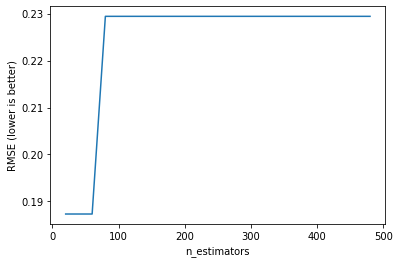

In [119]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [120]:
#  The lowest test error occurs for n_estimators 50 

rf = RandomForestClassifier(n_estimators=50, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Random Forest RMSE: 0.22941573387056177


In [121]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[32  3]
 [ 0 22]]


In [122]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.88      1.00      0.94        22

    accuracy                           0.95        57
   macro avg       0.94      0.96      0.95        57
weighted avg       0.95      0.95      0.95        57



# Gradient Boosting


In [123]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0702


In [124]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[32  3]
 [ 1 21]]


In [125]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.88      0.95      0.91        22

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



# PCA analysis

In [126]:
target_pca = data_set['diagnosis']
data_pca = data_set.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [127]:
pca = PCA(n_components = 2)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [128]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['COMP1'] ,
                        y = pca_std[pca_std['diagnosis'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot ',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
trace1 = pca_scatter('malignant','#FFD700')
trace2 = pca_scatter('benign','#7EC0EE')
plots = [trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
fig.show()

In [129]:
# How can I figure out what features are the COMP1 & COMP2? 

In [130]:
# building neural network

In [151]:
data_set.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [152]:
X = data_set.iloc[:,1:].values
y = data_set.iloc[:,0].values

In [153]:
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state = 0)

In [155]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
# Initialising the ANN
classifier = Sequential()

In [157]:
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`



In [158]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`



In [159]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



In [160]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/150
512/512 [==============================] - 0s 625us/step - loss: 0.6929 - accuracy: 0.5527
Epoch 2/150
512/512 [==============================] - 0s 23us/step - loss: 0.6916 - accuracy: 0.6289
Epoch 3/150
512/512 [==============================] - 0s 31us/step - loss: 0.6895 - accuracy: 0.6406
Epoch 4/150
512/512 [==============================] - 0s 54us/step - loss: 0.6859 - accuracy: 0.6621
Epoch 5/150
512/512 [==============================] - 0s 46us/step - loss: 0.6800 - accuracy: 0.7539
Epoch 6/150
512/512 [==============================] - 0s 58us/step - loss: 0.6698 - accuracy: 0.8438
Epoch 7/150
512/512 [==============================] - 0s 39us/step - loss: 0.6548 - accuracy: 0.9082
Epoch 8/150
512/512 [==============================] - 0s 40us/step - loss: 0.6332 - accuracy: 0.9258
Epoch 9/150
512/512 [==============================] - 0s 58us/step - loss: 0.6032 - accuracy: 0.9336
Epoch 10/150
512/512 [==============================] - 0s 40us/step - loss: 0.56

512/512 [==============================] - 0s 37us/step - loss: 0.0546 - accuracy: 0.9863
Epoch 81/150
512/512 [==============================] - 0s 23us/step - loss: 0.0562 - accuracy: 0.9863
Epoch 82/150
512/512 [==============================] - 0s 18us/step - loss: 0.0535 - accuracy: 0.9863
Epoch 83/150
512/512 [==============================] - 0s 20us/step - loss: 0.0553 - accuracy: 0.9863
Epoch 84/150
512/512 [==============================] - 0s 26us/step - loss: 0.0549 - accuracy: 0.9844
Epoch 85/150
512/512 [==============================] - 0s 23us/step - loss: 0.0537 - accuracy: 0.9863
Epoch 86/150
512/512 [==============================] - 0s 27us/step - loss: 0.0521 - accuracy: 0.9863
Epoch 87/150
512/512 [==============================] - 0s 26us/step - loss: 0.0523 - accuracy: 0.9863
Epoch 88/150
512/512 [==============================] - 0s 27us/step - loss: 0.0525 - accuracy: 0.9844
Epoch 89/150
512/512 [==============================] - 0s 25us/step - loss: 0.0486 - 

In [162]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [165]:

cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[34  1]
 [ 0 22]]


In [166]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

